In [23]:
%matplotlib inline
import numpy as np
import pickle
import matplotlib.pyplot as plt

filename = 'simulation_data.pickle'
f = open(filename,'rb')
data = pickle.load(f)
filename = 'simulation_data_only_post.pickle'
f = open(filename,'rb')
data_post = pickle.load(f)
filename = 'simulation_data_only_pre.pickle'
f = open(filename,'rb')
data_pre = pickle.load(f)
filename = 'simulation_data_dualCEVAE_pre_noise_lr.pickle'
f = open(filename,'rb')
data_dual_pre_big_lr = pickle.load(f)
filename = 'simulation_data_dualCEVAE_post_noise_lr.pickle'
f = open(filename,'rb')
data_dual_post_big_lr = pickle.load(f)

In [24]:
noises1 = data['noises_1_before']
noises2 = data['noises_2_after']
noisesX = data['noisesX']
noisesY = data['noisesY']
means_train = data['mean_train']
stds_train = data['std_train'] 
means_test = data['mean_test'] 
stds_test = data['std_test']

means_test_post = data_post['mean_test'] 
stds_test_post = data_post['std_test']

means_test_pre = data_pre['mean_test'] 
stds_test_pre = data_pre['std_test']


means_test_dual_pre_lr = data_dual_pre_big_lr['mean_test'] 
stds_test_dual_pre_lr = data_dual_pre_big_lr['std_test']

means_test_dual_post_lr = data_dual_post_big_lr['mean_test'] 
stds_test_dual_post_lr = data_dual_post_big_lr['std_test']




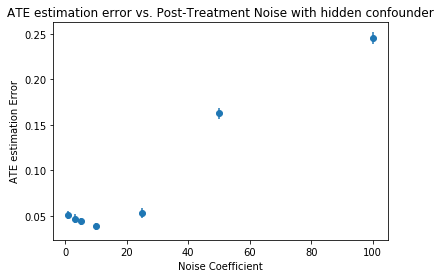

In [16]:
plt.figure
plt.errorbar(noises1,means_test_post,yerr=stds_test_post, linestyle='', fmt='o')
plt.xlabel('Noise Coefficient')
plt.ylabel('ATE estimation Error')
plt.title('ATE estimation error vs. Post-Treatment Noise with hidden confounder')
plt.savefig('Noise_post_hidden.png')

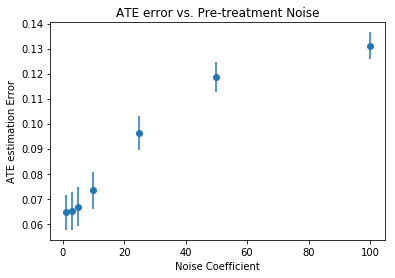

In [6]:
plt.figure
plt.errorbar(noises1,means_test[:,0],yerr=stds_test[:,0], linestyle='None', fmt='o')
plt.xlabel('Noise Coefficient')
plt.ylabel('ATE estimation Error')
plt.title('ATE estimation error vs. Pre-treatment Noise')
plt.savefig('Noise1.png')

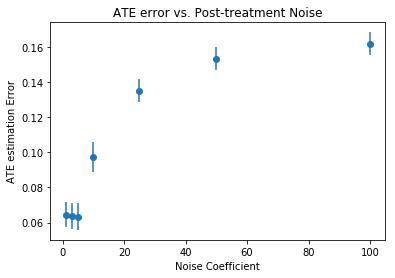

In [7]:
plt.figure
plt.errorbar(noises1,means_test[0,:],yerr=stds_test[0,:], linestyle='None', fmt='o')
plt.xlabel('Noise Coefficient')
plt.ylabel('ATE estimation Error')
plt.title('ATE estimation error vs. Post-treatment Noise')
plt.savefig('Noise2.png')

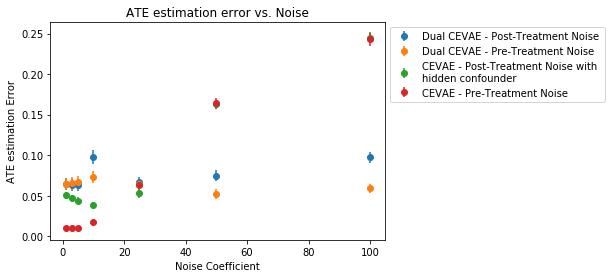

In [59]:
plt.figure


post_mean_best = np.min(np.concatenate((means_test[0,:][np.newaxis,:],means_test_dual_post_lr[np.newaxis,:]),axis=0),axis=0)
pre_mean_best = np.min(np.concatenate((means_test[:,0][np.newaxis,:],means_test_dual_pre_lr[np.newaxis,:]),axis=0),axis=0)

plt.errorbar(noises1,post_mean_best,yerr=stds_test[0,:], linestyle='None', fmt='o')
plt.errorbar(noises1,pre_mean_best,yerr=stds_test[:,0], linestyle='None', fmt='o')
plt.errorbar(noises1,means_test_post,yerr=stds_test_post, linestyle='None', fmt='o')
plt.errorbar(noises1,means_test_pre,yerr=stds_test_pre, linestyle='None', fmt='o')


plt.legend(['Dual CEVAE - Post-Treatment Noise','Dual CEVAE - Pre-Treatment Noise','CEVAE - Post-Treatment Noise with \nhidden confounder','CEVAE - Pre-Treatment Noise']
           ,bbox_to_anchor=(1,1))
plt.xlabel('Noise Coefficient')
plt.ylabel('ATE estimation Error')
plt.title('ATE estimation error vs. Noise')
plt.savefig('NoiseComparisonBest.png')

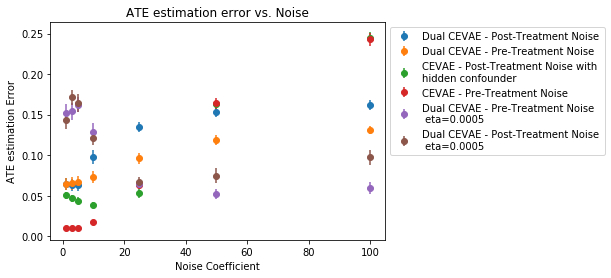

In [30]:
plt.figure
plt.errorbar(noises1,means_test[0,:],yerr=stds_test[0,:], linestyle='None', fmt='o')
plt.errorbar(noises1,means_test[:,0],yerr=stds_test[:,0], linestyle='None', fmt='o')
plt.errorbar(noises1,means_test_post,yerr=stds_test_post, linestyle='None', fmt='o')
plt.errorbar(noises1,means_test_pre,yerr=stds_test_pre, linestyle='None', fmt='o')
plt.errorbar(noises1,means_test_dual_pre_lr,yerr=stds_test_dual_pre_lr, linestyle='None', fmt='o')
plt.errorbar(noises1,means_test_dual_post_lr,yerr=stds_test_dual_post_lr, linestyle='None', fmt='o')


plt.legend(['Dual CEVAE - Post-Treatment Noise','Dual CEVAE - Pre-Treatment Noise','CEVAE - Post-Treatment Noise with \nhidden confounder','CEVAE - Pre-Treatment Noise',
           'Dual CEVAE - Pre-Treatment Noise\n eta=0.0005','Dual CEVAE - Post-Treatment Noise\n eta=0.0005'],
bbox_to_anchor=(1,1))
plt.xlabel('Noise Coefficient')
plt.ylabel('ATE estimation Error')
plt.title('ATE estimation error vs. Noise')
plt.savefig('NoiseComparisonAll.png')

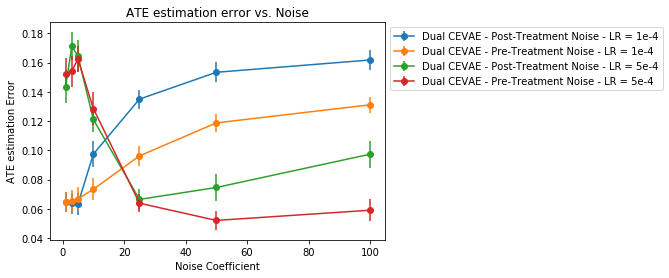

In [32]:
plt.figure
plt.errorbar(noises1,means_test[0,:],yerr=stds_test[0,:], linestyle='-', fmt='o')
plt.errorbar(noises1,means_test[:,0],yerr=stds_test[:,0], linestyle='-', fmt='o')
plt.errorbar(noises1,means_test_dual_post_lr,yerr=stds_test_dual_post_lr, linestyle='-', fmt='o')
plt.errorbar(noises1,means_test_dual_pre_lr,yerr=stds_test_dual_pre_lr, linestyle='-', fmt='o')



plt.legend(['Dual CEVAE - Post-Treatment Noise - LR = 1e-4','Dual CEVAE - Pre-Treatment Noise - LR = 1e-4',
            'Dual CEVAE - Post-Treatment Noise - LR = 5e-4','Dual CEVAE - Pre-Treatment Noise - LR = 5e-4'],
bbox_to_anchor=(1,1))
plt.xlabel('Noise Coefficient')
plt.ylabel('ATE estimation Error')
plt.title('ATE estimation error vs. Noise')
plt.savefig('NoiseComparisonLR.png')

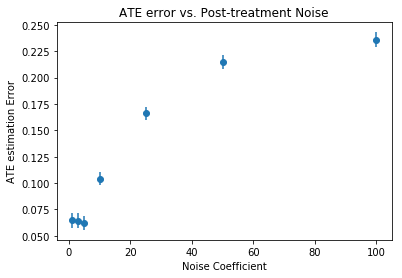

In [23]:
plt.figure

plt.errorbar(noises1,np.diag(means_test),yerr=np.diag(stds_test), linestyle='None', fmt='o')
plt.xlabel('Noise Coefficient')
plt.ylabel('ATE estimation Error')
plt.title('ATE estimation error vs. Post-treatment Noise')
plt.savefig('NoiseDiagonal.png')

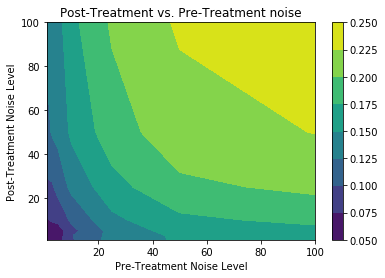

In [18]:
plt.figure
plt.contourf(noisesX,noisesY,means_test)
plt.title('Post-Treatment vs. Pre-Treatment noise')
plt.xlabel('Pre-Treatment Noise Level')
plt.ylabel('Post-Treatment Noise Level')
cbar = plt.colorbar()
plt.savefig('Contour.png')